# NMF on Iris dataset

In [6]:
import numpy as np
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [22]:
iris = load_iris()

# Extract the data matrix
X = iris.data

# Perform NMF
model = NMF(n_components=3, init='random', random_state=109)
W = model.fit_transform(X)
H = model.components_

# Print the basis vectors and the coefficients
print("Basis vectors:\n", H)
print("Coefficients:\n", W)


Basis vectors:
 [[2.86521248 0.27155655 3.03686792 0.82115797]
 [1.17642177 0.83097372 0.23163642 0.        ]
 [0.50583931 3.68467229 3.29433746 3.48790131]]
Coefficients:
 [[1.18939853e-01 4.03409823e+00 3.07553385e-02]
 [2.03513552e-01 3.62130229e+00 0.00000000e+00]
 [1.17905654e-01 3.69361046e+00 2.75955304e-02]
 [1.77305950e-01 3.48746158e+00 3.41345523e-02]
 [8.40027883e-02 4.04234078e+00 5.29322440e-02]
 [1.33225948e-01 4.23563775e+00 9.05388179e-02]
 [8.38277278e-02 3.68833932e+00 7.94566154e-02]
 [1.54406811e-01 3.87506335e+00 3.26525056e-02]
 [1.76439853e-01 3.31073384e+00 2.40033227e-02]
 [2.07104298e-01 3.66397859e+00 0.00000000e+00]
 [1.31507672e-01 4.26266513e+00 3.11704590e-02]
 [1.54936704e-01 3.72427103e+00 5.67265784e-02]
 [1.89715653e-01 3.59390095e+00 0.00000000e+00]
 [6.95416327e-02 3.48679980e+00 1.96731360e-02]
 [3.68085202e-02 4.79160892e+00 1.57628485e-02]
 [4.28772669e-03 4.78579180e+00 1.14410764e-01]
 [3.74925976e-02 4.42409377e+00 7.19713993e-02]
 [1.1910099

/Users/tx/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [23]:
X_reconstructed = np.dot(W, H)

# Compute the MSE
mse = np.mean((X - X_reconstructed) ** 2)
print('MSE:', mse)

MSE: 0.0061121582490840905


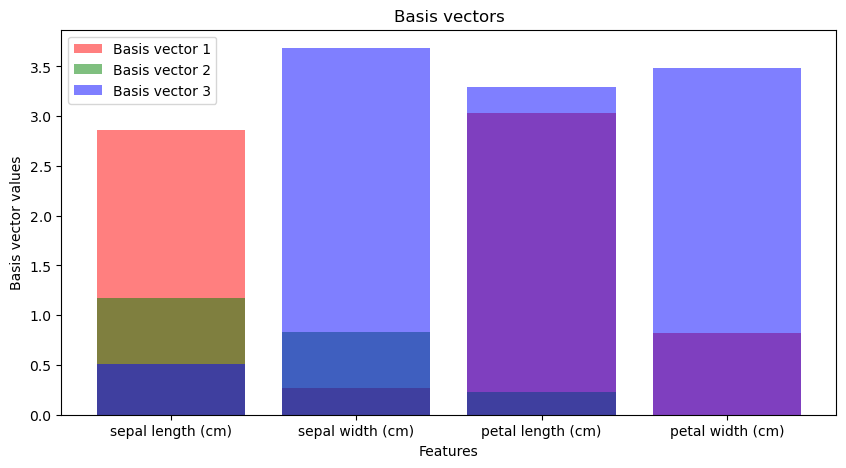

In [27]:
# Visualize the basis vectors
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(H)+1), H[0], color='r', alpha=0.5, label='Basis vector 1')
ax.bar(range(len(H)+1), H[1], color='g', alpha=0.5, label='Basis vector 2')
ax.bar(range(len(H)+1), H[2], color='b', alpha=0.5, label='Basis vector 3')
ax.set_xticks(range(len(iris.feature_names)))
ax.set_xticklabels(iris.feature_names)
ax.set_xlabel('Features')
ax.set_ylabel('Basis vector values')
ax.set_title('Basis vectors')
ax.legend()
plt.show()

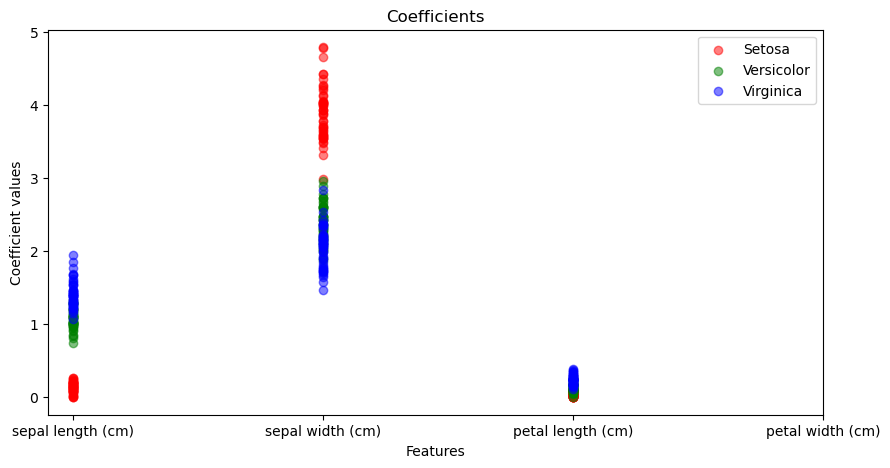

In [25]:
# Visualize the coefficients
fig, ax = plt.subplots(figsize=(10, 5))
labels_added = set()  # keep track of which labels have been added
for i in range(W.shape[0]):
    if iris.target[i] == 0:
        color = 'r'
        label = 'Setosa'
    elif iris.target[i] == 1:
        color = 'g'
        label = 'Versicolor'
    else:
        color = 'b'
        label = 'Virginica'
    if label not in labels_added:
        ax.scatter(range(W.shape[1]), W[i], color=color, alpha=0.5, label=label)
        labels_added.add(label)
    else:
        ax.scatter(range(W.shape[1]), W[i], color=color, alpha=0.5)
ax.set_xticks(range(len(iris.feature_names)))
ax.set_xticklabels(iris.feature_names)
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient values')
ax.set_title('Coefficients')
ax.legend()
plt.show()

## Frobenius norm 

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

In [35]:
model = NMF(n_components=3, init='random', random_state=109, solver='mu', beta_loss='frobenius')
W = model.fit_transform(X)
H = model.components_

# Calculate Frobenius norm error
error = np.linalg.norm(X - W.dot(H), 'fro')
print("Frobenius norm error:", error)

Frobenius norm error: 3.9336047597905286


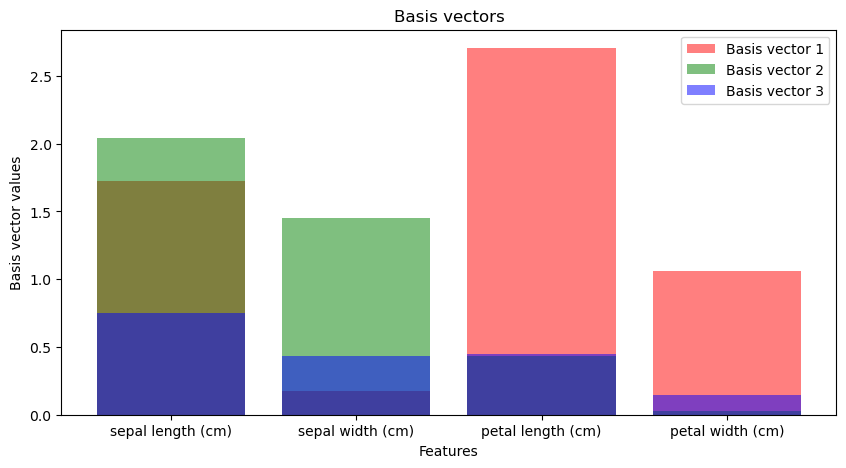

In [36]:
# Visualize the basis vectors
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(H)+1), H[0], color='r', alpha=0.5, label='Basis vector 1')
ax.bar(range(len(H)+1), H[1], color='g', alpha=0.5, label='Basis vector 2')
ax.bar(range(len(H)+1), H[2], color='b', alpha=0.5, label='Basis vector 3')
ax.set_xticks(range(len(iris.feature_names)))
ax.set_xticklabels(iris.feature_names)
ax.set_xlabel('Features')
ax.set_ylabel('Basis vector values')
ax.set_title('Basis vectors')
ax.legend()
plt.show()

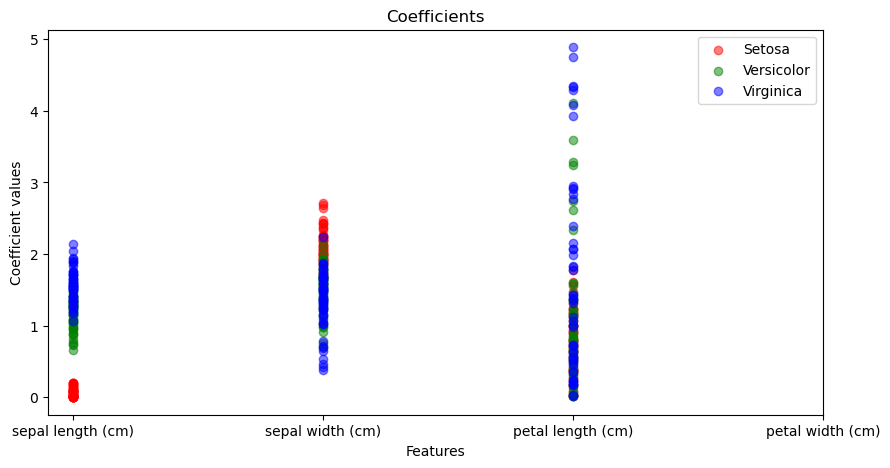

In [37]:
# Visualize the coefficients
fig, ax = plt.subplots(figsize=(10, 5))
labels_added = set()  # keep track of which labels have been added
for i in range(W.shape[0]):
    if iris.target[i] == 0:
        color = 'r'
        label = 'Setosa'
    elif iris.target[i] == 1:
        color = 'g'
        label = 'Versicolor'
    else:
        color = 'b'
        label = 'Virginica'
    if label not in labels_added:
        ax.scatter(range(W.shape[1]), W[i], color=color, alpha=0.5, label=label)
        labels_added.add(label)
    else:
        ax.scatter(range(W.shape[1]), W[i], color=color, alpha=0.5)
ax.set_xticks(range(len(iris.feature_names)))
ax.set_xticklabels(iris.feature_names)
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient values')
ax.set_title('Coefficients')
ax.legend()
plt.show()

# NMF on Swiss Roll Dataset

In [45]:
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# Load the dataset
X, y = make_swiss_roll(n_samples=2000, noise=0.0, random_state=None)

# Preprocess the data to remove negative values
#X[X < 0] = 0
X_scaled = X - np.min(X)

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (2000, 3)
y shape:  (2000,)


In [46]:
# X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [47]:
# Perform NMF
model = NMF(n_components=3, init='random', random_state=109)
# W = model.fit_transform(X_train)
W = model.fit_transform(X)
H = model.components_

# Print the basis vectors and the coefficients
print("Basis vectors:\n", H)
print("Coefficients:\n", W)

Basis vectors:
 [[0.00000000e+00 3.65439093e+00 9.39197646e-12]
 [5.80455870e-06 0.00000000e+00 2.65974300e+00]
 [9.02663241e-01 2.23082156e-02 0.00000000e+00]]
Coefficients:
 [[ 0.30472009  1.4675114   6.28445903]
 [ 4.04877917  0.         13.89065297]
 [ 4.48495922  0.          0.71832661]
 ...
 [ 1.10325927  2.97304675  0.        ]
 [ 0.9763768   0.          0.        ]
 [ 3.94531329  0.          6.76542012]]


In [48]:
X_reconstructed = np.dot(W, H)

# Compute the MSE
# mse = np.mean((X_train - X_reconstructed) ** 2)
mse = np.mean((X - X_reconstructed) ** 2)
print('MSE:', mse)

MSE: 2.0386778127426016e-05


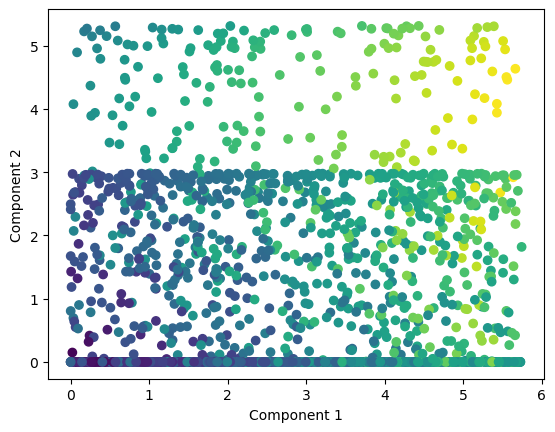

In [49]:
# Visualize the components
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(W[:, 0], W[:, 1], c=X.sum(axis=1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()

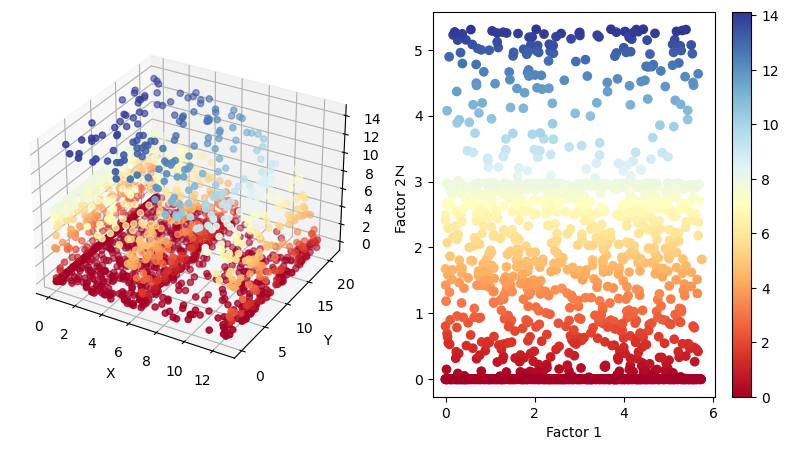

In [50]:
fig = plt.figure(figsize=(10,5))

# Plot the input data
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,2], cmap=plt.cm.RdYlBu)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the NMF factorization
ax = fig.add_subplot(122)
scatter = ax.scatter(W[:,0], W[:,1], c=X[:,2], cmap=plt.cm.RdYlBu)
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
plt.colorbar(scatter)

plt.show()

## Frobenius norm error

In [42]:
X, _ = make_swiss_roll(n_samples=2000, noise=0.0, random_state=None)
X[X < 0] = 0

model = NMF(n_components=3, init='random', random_state=109, solver='mu', beta_loss='frobenius')
W = model.fit_transform(X)
H = model.components_

# Calculate Frobenius norm error
error = np.linalg.norm(X - W.dot(H), 'fro')
print("Frobenius norm error:", error)

Frobenius norm error: 5.1887089303947915


/Users/tx/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


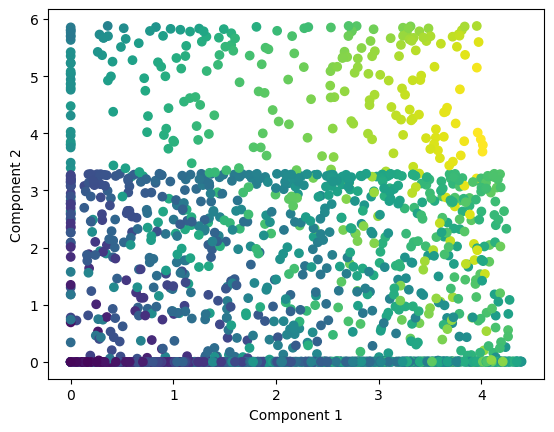

In [43]:
# Visualize the components
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(W[:, 0], W[:, 1], c=X.sum(axis=1))
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()

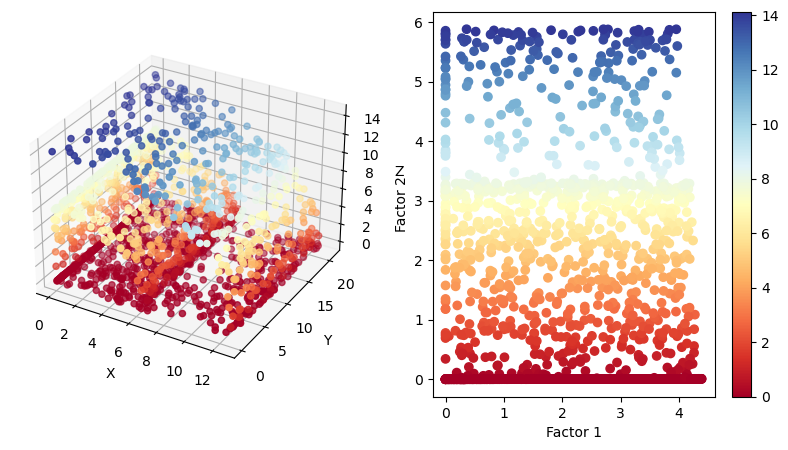

In [44]:
fig = plt.figure(figsize=(10,5))

# Plot the input data
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,2], cmap=plt.cm.RdYlBu)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the NMF factorization
ax = fig.add_subplot(122)
scatter = ax.scatter(W[:,0], W[:,1], c=X[:,2], cmap=plt.cm.RdYlBu)
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
plt.colorbar(scatter)

plt.show()